# Demonstration Jupyter Notebook for wetCopRF
*Credits: Florian Hellwig & Henrik Schmidt, 2022
<br>This Jupyter Notebook is for demonstration purpose only.*

If you want to use the package you only have to run the [Client.py](https://github.com/Henno-hash/wetCopRF/blob/master/Client.py). There you have to define the workspace-name, foldername and the paths to the input data:
```
workspace = r"...."
foldername = '....'
origin_sentinel = [r"....\VH",r"....\VV"]
origin_wetland = r"....\DATA"
origin_wetland_color = r"....\Symbology"
```
Then you have to call **wetCopRF**:
```
wetCopRF.wetCopRF(foldername, workspace, origin_wetland, origin_wetland_color, origin_sentinel)
```
 All the necessary functions for **wetCopRF** will be explained stepwise. 
For further explanation for the functions read [Documentation](https://wetcoprf.readthedocs.io/en/latest/#).
For further informations about requirements (data, installation, ...) read [ReadMe](https://github.com/Henno-hash/wetCopRF/blob/master/README.md).

<hr style="border:1px solid black"></hr>

### The Notebook distinguishes between 3 categories:
* **Background function**: 
    * For this function no userwise input or interactions is required. Runs silently in the background.
* <span style="color:blue">Inputs</span>: 
    * For this function users has to define a variable ([paths](#11) or [names](#12)). Required as parameter.
* <span style="color:DodgerBlue">Interactions</span>:
    * For this function users has to interact with the console to answer questions ([1](#21), [2](#22)), select [model-numbers](#31) and [customise hyperparameters](#32).

<hr style="border:1px solid black"></hr>

<a id='0'></a>
## Content:
*  [Create_project-structure](#Create_project-structure )
    * <span style="color:blue">Input required</span>
* [2. Set paths to Input-datasets ](#2)
    * <span style="color:blue">Input required</span>
* [3. Copy files to the project-folders](#3)
    * Background function
* [4. Dataprocessing](#4)
    * Background function
* [5. RandomForest classification](#5)
    * <span style="color:DodgerBlue">Interaction required</span>
* [6. Export classification](#6)
    * Background function
* [7. Repeat classification](#7)
    * <span style="color:DodgerBlue">Interaction required</span>

<hr style="border:1px solid black"></hr>

### Create_project-structure 

Define your foldername and the workspace. Keep in mind: The workspace requires approximatly twice as much free space on the harddrive as the input data. All files will be copied into your defined foldername.
- <span style="color:blue">**foldername**</span>: str
  * name of the parent project folder
- <span style="color:blue">**workspace**</span>: str
  * path to the project workspace
  
Back to [Content](#0)

<a id='12'></a>

In [1]:
from module import check_project_structure
workspace = r'....'
foldername = 'Showcase'
folders = check_project_structure(foldername, workspace)

#### Results from check_project_structure:

* **folders**: *list*
    * list contains 4 subfolders:
        - 0_input_wetland: Copernicus HRES Wetland data, symbology file and the merged reference map
        - 1_input_sentinel1: Sentinel-1 data
        - 2_class_train_test: Main data-, train- and test-stack
        - 3_class_results: All classification-results and the randomforest-model

In [2]:
folders

['F:\\UNI\\a\\2_Testrun\\Showcase',
 'F:\\UNI\\a\\2_Testrun\\Showcase\\0_input_wetland',
 'F:\\UNI\\a\\2_Testrun\\Showcase\\1_input_sentinel1',
 'F:\\UNI\\a\\2_Testrun\\Showcase\\2_class_train_test',
 'F:\\UNI\\a\\2_Testrun\\Showcase\\3_class_results']

If you want to start another classification run with different data or settings you can create a new workspace...

In [3]:
folders = check_project_structure(foldername, workspace)

Showcase already exists. Do you want to create a new folder?(y) Or do you want to use the existing folder?(n) [(y/1)/(n/0)]
y
Please rename your folder Showcase. 
New Foldername:Showcase2


... or reuse the already existing folder-structure.

In [4]:
folders = check_project_structure(foldername, workspace)

Showcase already exists. Do you want to create a new folder?(y) Or do you want to use the existing folder?(n) [(y/1)/(n/0)]
n


<hr style="border:1px solid black"></hr>

<a id='2'></a>
## 2. Set paths to Input-datasets 

Define your paths to the input-datasets.
- <span style="color:blue">**origin_sentinel**</span>: *[str, str]*
  * list contains the path to the sentinel-1 data
- <span style="color:blue">**origin_wetland**</span>: *str*
  * path to the reference data
- <span style="color:blue">**origin_wetland_color**</span>: *str*
  * path to the reference symbology 
  
<br>Back to [Content](#0)

<a id='11'></a>

In [5]:
# Please set your path to the origin Sentinel-1 radardata (VH,VV)
origin_sentinel = [r"....\VH",
                   r"....\VV"]

# Please set your path to the origin Wetland HRES Copernicus data
origin_wetland = r"....\DATA"

# Please set your path to the symbology folder of the origin Wetland HRES Copernicus data
origin_wetland_color = r"....\Symbology"

<hr style="border:1px solid black"></hr>

<a id='3'></a>
## 3. Copy files to the project-folders

All files are copied to the created project folders if they are not present in the project. The copying process is skipped if there is no change in the number of files.

<br>Back to [Content](#0)

### Background function: copy_wetland 
Copy reference input-data to the project-folder (0_input_wetland).

In [6]:
from module import copy_wetland
copy_wetland(origin_wetland, folders)

copying files from F:\UNI\a\0_Basedata\WAW_2018_010m_ee_03035_v020-20211105T103255Z-001\WAW_2018_010m_ee_03035_v020\DATA


100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


### Background function: copy_wetland_color 
Copy reference input data to the project-folder (0_input_wetland).

In [7]:
from module import copy_wetland_color
color_file = copy_wetland_color(origin_wetland_color, folders)

copying files from F:\UNI\a\0_Basedata\WAW_2018_010m_ee_03035_v020-20211105T103255Z-001\WAW_2018_010m_ee_03035_v020\Symbology


100% (1 of 1) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00


### Background function: copy_sentinel1_data 
Copy Sentinel-1 input data to the project-folder (1_input_sentinel1).

In [8]:
from module import copy_sentinel1_data
s1_stack_changed = copy_sentinel1_data(origin_sentinel, folders)

copying files from F:\UNI\a\0_Basedata\SWOS_Estonia_Matsalu\VH


100% (130 of 130) |######################| Elapsed Time: 0:00:22 Time:  0:00:22


copying files from F:\UNI\a\0_Basedata\SWOS_Estonia_Matsalu\VV


100% (130 of 130) |######################| Elapsed Time: 0:00:22 Time:  0:00:22


### Background function: colorpicker
Function to extract the classes and class-colors.

In [9]:
from module import colorpicker
classes, color_list, classes_label = colorpicker(color_file)

#### Results from colorpicker:
* **classes**: *list*
    * list contains the reference class-numbers as int
* **color_list**: *list*
    * list containing the RGBA-values from reference
* **classes_label**: *list*
    * list containing the class-labels to the matching colors

In [10]:
classes

array([  0,   1,   2,   3,   4, 253], dtype=int64)

In [11]:
color_list

array([[  0, 255, 255, 255],
       [  1,   0,  77, 168],
       [  2,   0, 112, 255],
       [  3,   0, 197, 255],
       [  4, 115, 255, 223],
       [253, 255, 237, 195]], dtype=int64)

In [12]:
classes_label

array(['Dry', 'Permanent water', 'Temporary water', 'Permanent wet',
       'Temporary wet', 'Sea water'], dtype=object)

<hr style="border:1px solid black"></hr>

<a id='4'></a>
## 4. Dataprocessing

Store all the copied files in a single dataframe. Split this dataframe into test- and train subdataframes. Export all three dataframes as feather-files. Skip the dataframe creation if they already exist and load them.

<br>Back to [Content](#0)

### Background function: check_df_train_test 
Function to check if train/test data already exists. If not call the necessary functions to create them, else load the saved files. .
1. Check if df/train/test data already exists as feather. Check also for changes between input-data and existing dataframes. If they exist and nothing changed  load them (*skip step 2 to 4*). 
2. If not existing or they are changed call *datastack_creation*, where the reference product is preprocessed (*intersect, merge, reproject_resample*) , the Sentinel-1 dataframe is also created (*sentinel_stack*) and both dataframes are merged (*ds_s1_ref_to_df*). 
3. Mask the inner edge pixels of the contigous class areas (*ref_erosion*) and drop sentinel-1 scene, if there are more then 90% nan-values to avoid problems with randomforest classification (*handle_nan*).

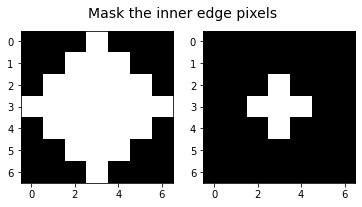

4. Split df in eroded train- and test-stacks (split = train 80% & test 20%). Saves the stacks as feather files (*test_train_split*)

In [14]:
from module import check_df_train_test
df, df_train, df_test = check_df_train_test(classes, folders, s1_stack_changed)

[#############_________________________________________________________]
Preprocessing s1_stack...
------------------------------------------------------------
creating Sentinel-1 stack from F:\UNI\a\2_Testrun\Showcase\1_input_sentinel1


100% (260 of 260) |######################| Elapsed Time: 0:00:05 Time:  0:00:05


[#################_____________________________________________________]
creating dataframe...


N/A% (0 of 6) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

[####################__________________________________________________]
Eroding ref_classes...


C:\Users\Henno\anaconda3\envs\GEO419noerror\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
100% (6 of 6) |##########################| Elapsed Time: 0:00:04 Time:  0:00:04


[#######################_______________________________________________]
Splitting stack...


100% (6 of 6) |##########################| Elapsed Time: 0:00:02 Time:  0:00:02


[###########################___________________________________________]
Saving s1_stack...
Saving test-data...
Saving train-data...


 
<br>*SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.*
<br>
<br>Keep in mind:
<br>In case of **wetCopRF** this warning can be ignored. All dataframes are processed correctly. This appears only with fast processing speed.

If the stacks are already existing s1_stack_changed will be False and the stacks will be loaded:

In [18]:
from module import check_df_train_test
df, df_train, df_test = check_df_train_test(classes, folders, s1_stack_changed)

[####################__________________________________________________]
Loading stored data...


#### Results from check_df_train_test:

* **df**: *pandas.DataFrame*
    * merged sentinel-1, reference data and pixelcoordinates as a pandas DataFrame, with eroded reference class-pixels, without NaNs
* **df_train**: *pandas.DataFrame*
    * train-dataframe containing 80% of df
* **df_test**: *pandas.DataFrame*
    * test-dataframe containing 20% of df

In [19]:
df.iloc[:,:8].head()

,row_col,wetland_ref,wetland_ref_eroded,wetland_ref_eroded_train,2017-01-07_VH_A,2017-01-07_VV_A,2017-01-31_VH_A,2017-01-31_VV_A
0,0_0,255,NaN,NaN,-30.398285,-21.059654,-23.200266,-10.731075
1,0_1,255,NaN,NaN,-28.946789,-17.924881,-20.080769,-12.279129
2,0_2,255,NaN,NaN,-29.052326,-17.229664,-21.315304,-17.150190
3,0_3,255,NaN,NaN,-26.836800,-18.115711,-24.533642,-12.982988
4,0_4,255,NaN,NaN,-27.996807,-17.115908,-24.858873,-17.287565


In [20]:
df_train.iloc[:,:8].head()

,row_col,wetland_ref,wetland_ref_eroded,wetland_ref_eroded_train,2017-01-07_VH_A,2017-01-07_VV_A,2017-01-31_VH_A,2017-01-31_VV_A
0,1_494,253,253.0,253.0,-28.660616,-19.333942,-23.270666,-14.441373
1,1_495,253,253.0,253.0,-28.472885,-23.750284,-18.747456,-13.667220
2,1_497,253,253.0,253.0,-27.081799,-22.387558,-19.738783,-12.211069
3,1_498,253,253.0,253.0,-24.444159,-21.334295,-19.620794,-12.221136
4,1_500,253,253.0,253.0,-26.494408,-21.307632,-18.792061,-12.777061


In [21]:
df_test.iloc[:,:8].head()

,row_col,wetland_ref,wetland_ref_eroded,wetland_ref_eroded_train,2017-01-07_VH_A,2017-01-07_VV_A,2017-01-31_VH_A,2017-01-31_VV_A
0,1_496,253,253.0,-99.0,-29.123297,-22.786947,-19.316139,-13.010308
1,1_499,253,253.0,-99.0,-25.836235,-23.648149,-19.842468,-10.070494
2,1_504,253,253.0,-99.0,-28.447300,-22.015064,-21.905327,-14.840987
3,1_511,0,0.0,-99.0,-18.645428,-12.661469,-12.124276,-10.765013
4,1_513,0,0.0,-99.0,-18.454271,-11.693487,-14.177684,-7.906669


#### Columns:
* column 0: row_col: Contains the pixel-coordinates (rows_columns)
* column 1: wetland_ref: Contains the reference class numbers
* column 2: wetland_ref_eroded: Contains the remaining eroded class numbers
* column 3: wetland_ref_eroded_train: Contains split class number (train dataframe lists the real class numbers and in test dataset -99)
* columns >=4: Sentinel-1 data (aquisitiondate_polarisation_orbitdirection)

<hr style="border:1px solid black"></hr>

<a id='5'></a>
## 5. RandomForest classification

Run a selected randomforest classification where optionally hyperparameters can be set by the users. Export and evaluate the results.

<br>Back to [Content](#0)


### Background function: model_call

1. Ask the user to load or create a new model  (<span style="color:DodgerBlue">*user_yes_no_query*</span>) if the user wants to load a model skip step 2 to 4 (<span style="color:DodgerBlue">*user_single_parameter*</span>) .
2. Ask the user for the hyperparameter validation method (<span style="color:DodgerBlue">*user_validation_method_query*</span>) and for default or customized  hyperparameters (<span style="color:DodgerBlue">*user_yes_no_query*</span>). If the user choose customized ask the user for depth and n-estimators(<span style="color:DodgerBlue">*user_single_parameter*</span> or <span style="color:DodgerBlue">*user_multi_parameter*</span>).
3. Runs a classification with the selected hyperparameters and validation-method (*rf_randomsearch_validation* or *rf_gridsearch_validation*).

#### Hyperparameters:
* **Depth**: Number of decision-layers
* **N-Estimators**: Number of decision-trees

#### Hyperparameter validation method Information:
* Tests definded parameter-setting for randomforest classification
* Each validation contains a 10-fold CV
* Only the best parameter-setting will be applied
* Function occupies all remaining cpu cores except one (*n_jobs=-2*)
<br/><br/>
- **Grid-Search**: Specific list of parameter-settings for depth and n-estimators. 
    - Default: depth: [2]   | n-estimators: [10]
    - Custom: depth: [2,3] | n-estimators: [50,100,225]
<br/><br/>
- **Random-Search**: Minimum and Maximum range splitted into n-equal steps for depth and n-estimators.
    - Default: depth: [2-3], n-equal: 1 | n-estimators: [100-150]
        * Returns: depth: [2]   | n-estimators: [100,150]
    - Custom: depth: [2-3], n-equal: 2 | n-estimators: [100-300], n-equal: 3
        * Returns: depth: [2,3] | n-estimators: [100,200,300]

4. Export the model as joblib file (*export_RandomForest*). 
5. Evaluate the results and save the created confusion matrix (*accuracy_accessment*).

#### Gridsearch default

<a id='21'></a>

[##############################________________________________________]
Starting classification...
------------------------------------------------------------
[###################################___________________________________]
Initialyse randomforest classification...
------------------------------------------------------------
Basis for the two validation- and hyperparametertuning-method:
- Tests definded parameter-setting for randomforest classification
- Each validation contains a 10-fold CV
- Only the best parameter-setting will be applied

Hyperparameters:
- Depth: Number of decision-layers
- N-Estimators: Number of decision-trees

Grid-Search: Specific list of parameter-settings for depth and n-estimators.
  Default: depth: [2]   | n-estimators: [10]
  Example: depth: [2,3] | n-estimators: [50,100,225]
Random-Search: Minimum and Maximum range splitted into n-equal steps for depth and n-estimators.
  Default: depth: [2-3], n-equal: 1 | n-estimators: [100-150], n-equal: 2
 -

N/A% (0 of 1) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

Using Grid-Search with default parameters
[########################################______________________________]
Initialising randomforest-model...
------------------------------------------------------------
Hyperparameters: max_depth: [2] , n_estimators: [10]
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done   2 out of  10 | elapsed:   43.4s remaining:  2.9min
[Parallel(n_jobs=-2)]: Done   5 out of  10 | elapsed:   43.8s remaining:   43.8s
[Parallel(n_jobs=-2)]: Done   8 out of  10 | elapsed:   43.9s remaining:   10.9s
[Parallel(n_jobs=-2)]: Done  10 out of  10 | elapsed:   44.0s finished
100% (1 of 1) |##########################| Elapsed Time: 0:01:13 Time:  0:01:13


[#############################################_________________________]
Exporting RF_Model...
[##################################################____________________]
Evaluating randomforest-model...


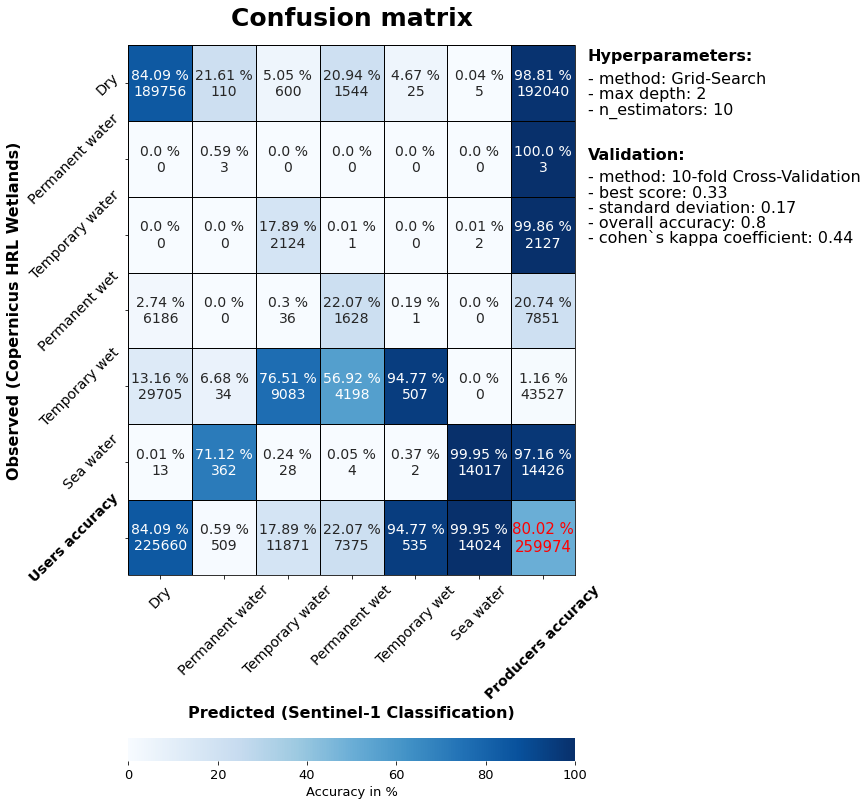

In [22]:
from module import model_call
randomforest_model, method_number, rf_folder = model_call(df_train, df_test, classes_label,folders)

#### Gridsearch custom

<a id='32'></a>

[##############################________________________________________]
Starting classification...
------------------------------------------------------------
Do you want to use an already existing randomforest-model [y] or create a new randomforest-model [n]? [(y/1)/(n/0)]
n
[###################################___________________________________]
Initialyse randomforest classification...
------------------------------------------------------------
Basis for the two validation- and hyperparametertuning-method:
- Tests definded parameter-setting for randomforest classification
- Each validation contains a 10-fold CV
- Only the best parameter-setting will be applied

Hyperparameters:
- Depth: Number of decision-layers
- N-Estimators: Number of decision-trees

Grid-Search: Specific list of parameter-settings for depth and n-estimators.
  Default: depth: [2]   | n-estimators: [10]
  Example: depth: [2,3] | n-estimators: [50,100,225]
Random-Search: Minimum and Maximum range splitted into 

N/A% (0 of 1) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

Completed...
[########################################______________________________]
Initialising randomforest-model...
------------------------------------------------------------
Hyperparameters: max_depth: [2] , n_estimators: [10, 20]
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done   3 out of  20 | elapsed:   51.3s remaining:  4.9min
[Parallel(n_jobs=-2)]: Done   9 out of  20 | elapsed:   52.2s remaining:  1.1min
[Parallel(n_jobs=-2)]: Done  15 out of  20 | elapsed:  1.5min remaining:   29.9s
[Parallel(n_jobs=-2)]: Done  20 out of  20 | elapsed:  2.0min finished
100% (1 of 1) |##########################| Elapsed Time: 0:03:01 Time:  0:03:01


[#############################################_________________________]
Exporting RF_Model...
[##################################################____________________]
Evaluating randomforest-model...


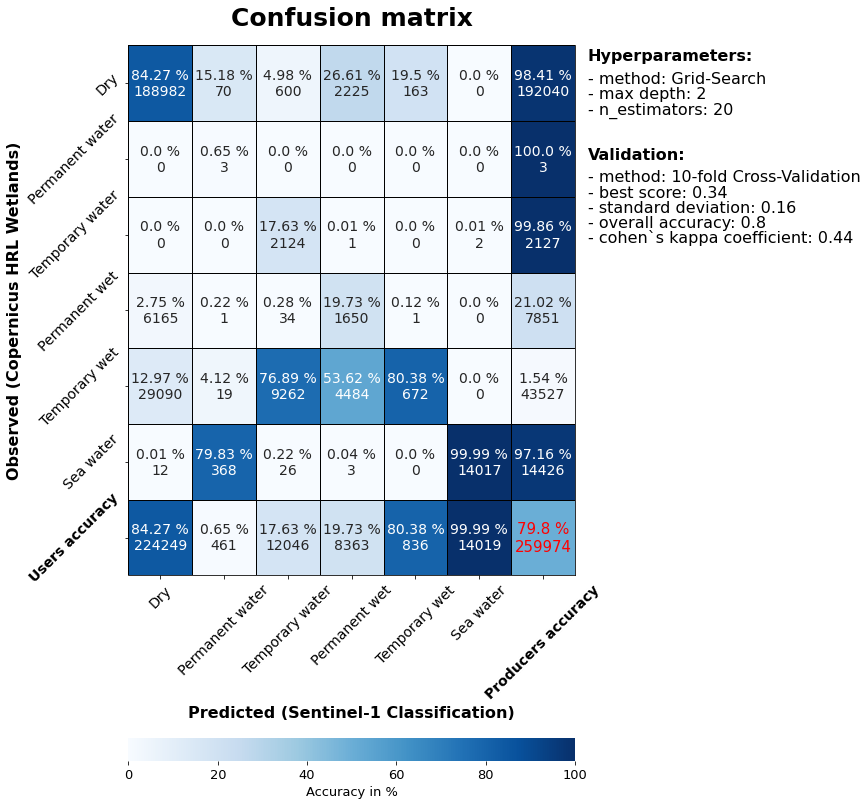

In [23]:
from module import model_call
randomforest_model, method_number, rf_folder = model_call(df_train, df_test, classes_label,folders)

#### Randomsearch default

[##############################________________________________________]
Starting classification...
------------------------------------------------------------
Do you want to use an already existing randomforest-model [y] or create a new randomforest-model [n]? [(y/1)/(n/0)]
n
[###################################___________________________________]
Initialyse randomforest classification...
------------------------------------------------------------
Basis for the two validation- and hyperparametertuning-method:
- Tests definded parameter-setting for randomforest classification
- Each validation contains a 10-fold CV
- Only the best parameter-setting will be applied

Hyperparameters:
- Depth: Number of decision-layers
- N-Estimators: Number of decision-trees

Grid-Search: Specific list of parameter-settings for depth and n-estimators.
  Default: depth: [2]   | n-estimators: [10]
  Example: depth: [2,3] | n-estimators: [50,100,225]
Random-Search: Minimum and Maximum range splitted into 

N/A% (0 of 1) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

Using Random-Search with default parameters
[########################################______________________________]
Initialising randomforest-model...
------------------------------------------------------------
Hyperparameters: max_depth: [2] , n_estimators: [100, 150]
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done   3 out of  20 | elapsed:  7.5min remaining: 42.4min
[Parallel(n_jobs=-2)]: Done   9 out of  20 | elapsed:  7.5min remaining:  9.2min
[Parallel(n_jobs=-2)]: Done  15 out of  20 | elapsed: 10.6min remaining:  3.5min
[Parallel(n_jobs=-2)]: Done  20 out of  20 | elapsed: 16.0min finished
100% (1 of 1) |##########################| Elapsed Time: 0:23:05 Time:  0:23:05


[#############################################_________________________]
Exporting RF_Model...
[##################################################____________________]
Evaluating randomforest-model...


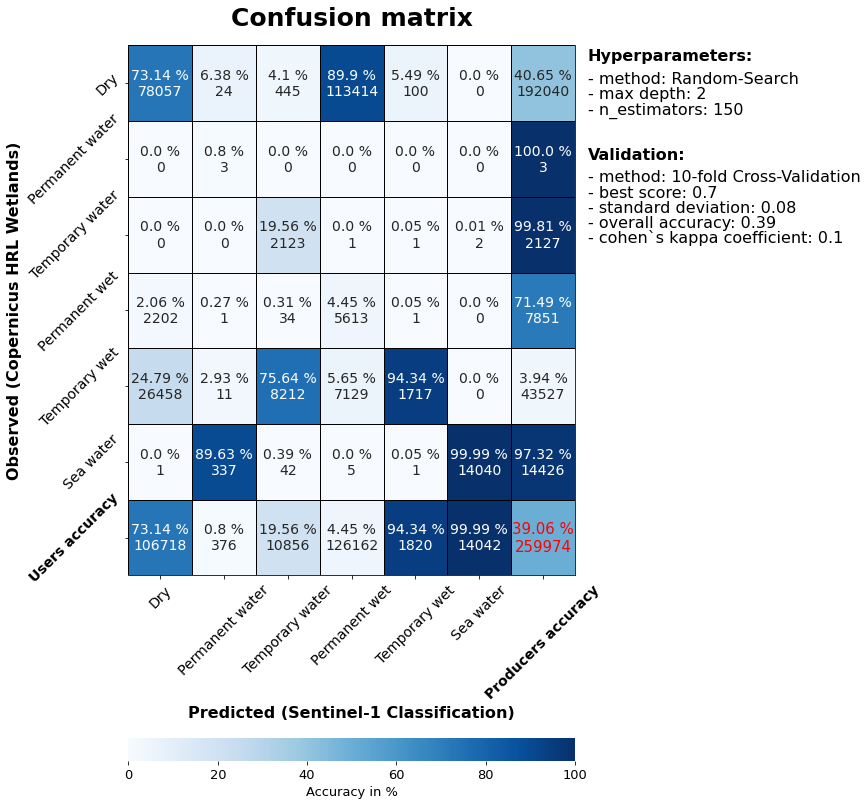

In [24]:
from module import model_call
randomforest_model, method_number, rf_folder = model_call(df_train, df_test, classes_label,folders)

#### Randomsearch custom

[##############################________________________________________]
Starting classification...
------------------------------------------------------------
Do you want to use an already existing randomforest-model [y] or create a new randomforest-model [n]? [(y/1)/(n/0)]
n
[###################################___________________________________]
Initialyse randomforest classification...
------------------------------------------------------------
Basis for the two validation- and hyperparametertuning-method:
- Tests definded parameter-setting for randomforest classification
- Each validation contains a 10-fold CV
- Only the best parameter-setting will be applied

Hyperparameters:
- Depth: Number of decision-layers
- N-Estimators: Number of decision-trees

Grid-Search: Specific list of parameter-settings for depth and n-estimators.
  Default: depth: [2]   | n-estimators: [10]
  Example: depth: [2,3] | n-estimators: [50,100,225]
Random-Search: Minimum and Maximum range splitted into 

N/A% (0 of 1) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

[########################################______________________________]
Initialising randomforest-model...
------------------------------------------------------------
Hyperparameters: max_depth: [2] , n_estimators: [10, 30, 50]
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done   3 out of  20 | elapsed:   51.4s remaining:  4.9min
[Parallel(n_jobs=-2)]: Done   9 out of  20 | elapsed:   52.0s remaining:  1.1min
[Parallel(n_jobs=-2)]: Done  15 out of  20 | elapsed:  2.1min remaining:   42.2s
[Parallel(n_jobs=-2)]: Done  20 out of  20 | elapsed:  2.6min finished
100% (1 of 1) |##########################| Elapsed Time: 0:03:07 Time:  0:03:07


[#############################################_________________________]
Exporting RF_Model...
[##################################################____________________]
Evaluating randomforest-model...


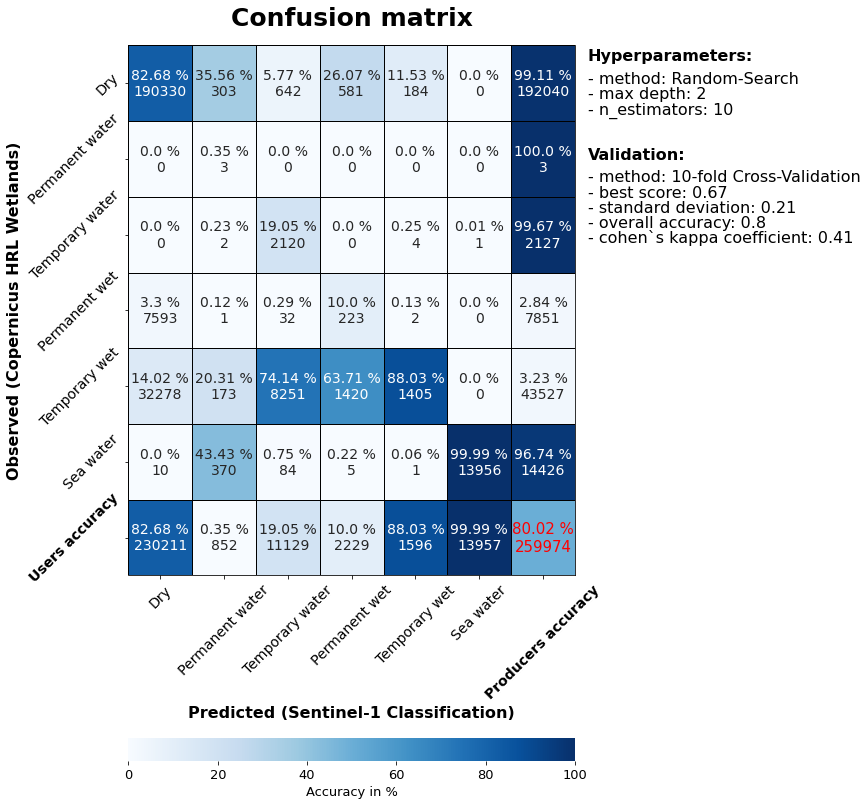

In [25]:
from module import model_call
randomforest_model, method_number, rf_folder = model_call(df_train, df_test, classes_label,folders)

#### Load existing model

<a id='31'></a>

[##############################________________________________________]
Starting classification...
------------------------------------------------------------
Do you want to use an already existing randomforest-model [y] or create a new randomforest-model [n]? [(y/1)/(n/0)]
y
[########################################______________________________]
Loading RF_Model...
------------------------------------------------------------
Please choose one of the preexisting models with the shown numbers:

0) rf_model_Grid-Search_depth_2_estim_10.joblib
1) rf_model_Grid-Search_depth_2_estim_20.joblib
2) rf_model_Random-Search_depth_2_estim_10.joblib
3) rf_model_Random-Search_depth_2_estim_150.joblib
Choose your value for rf_model_number in between 0 and 3 :
0
[##################################################____________________]
Evaluating randomforest-model...


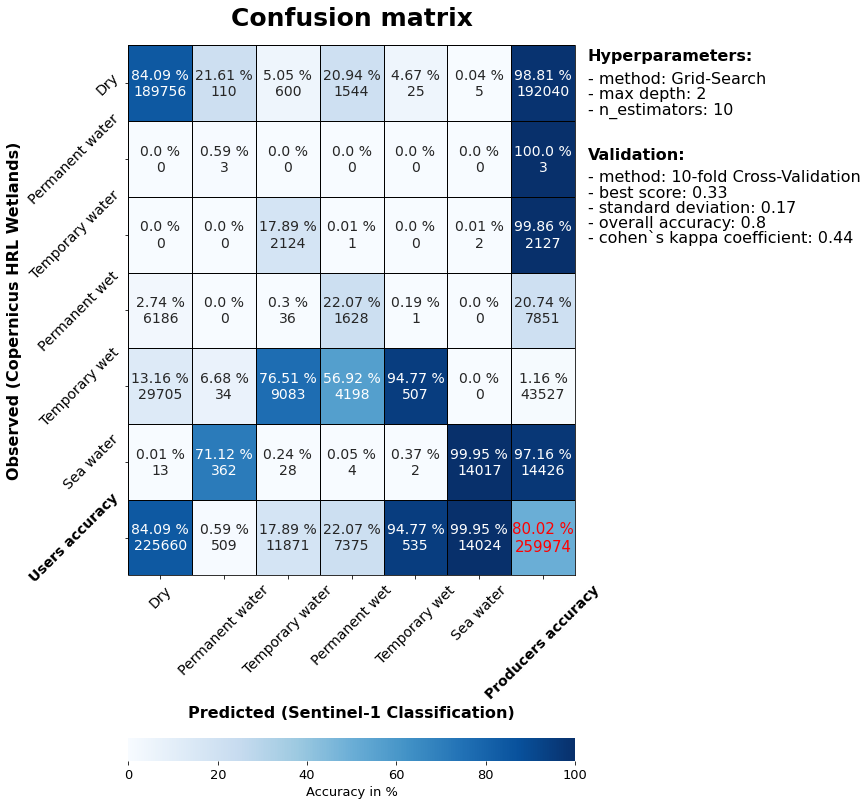

In [29]:
from module import model_call
randomforest_model, method_number, rf_folder = model_call(df_train, df_test, classes_label,folders)

#### Results: model_call
* **RandomForest_model**: *sklearn.ensemble.RandomForestClassifier*
    * randomforest classifier (grid- or random-search)
* **method_number**: *int*
    * number of validation- hyperparametertuning method (1 = grid-search, 2 = random-search)
* **rf_folder**: *str*
    * path to the selected model

In [30]:
randomforest_model

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-2, param_grid={'max_depth': [2], 'n_estimators': [10]},
             verbose=4)

In [31]:
method_number

'Grid-Search'

In [32]:
rf_folder

'F:\\UNI\\a\\2_Testrun\\Showcase\\3_class_results\\rf_model_Grid-Search_depth_2_estim_10'

<hr style="border:1px solid black"></hr>

<a id='6'></a>
## 6. Export classification
Create a predicted classification as a tif image for the entire dataframe and one tif image containing the masked edge pixels.

<br>Back to [Content](#0)

### Background functions: predict_image, predict_image_masked
1. Use the model for the entire dataframe to predict a classification with (*predict_image*) and without edge pixel mask (*predict_image_masked*).
2. Create a predicted image based on randomforest model with and without eroded pixels (*create_predicted_image*), change the default colors to the extracted class colors (*color_change*) and export the images as tif files (*create_geo_tiff*).

In [34]:
from module import predict_image
predict_image(df, randomforest_model, color_list, method_number, rf_folder, folders)

Saved the image in F:\UNI\a\2_Testrun\Showcase\3_class_results\rf_model_Grid-Search_depth_2_estim_10


In [35]:
from module import predict_image_masked
predict_image_masked(df_train, df_test, df, randomforest_model, color_list, method_number, rf_folder, folders)

Saved the masked image in F:\UNI\a\2_Testrun\Showcase\3_class_results\rf_model_Grid-Search_depth_2_estim_10


### Example: 
#### Results for Gridsearch default

#### Predicted image without masked edge pixels:
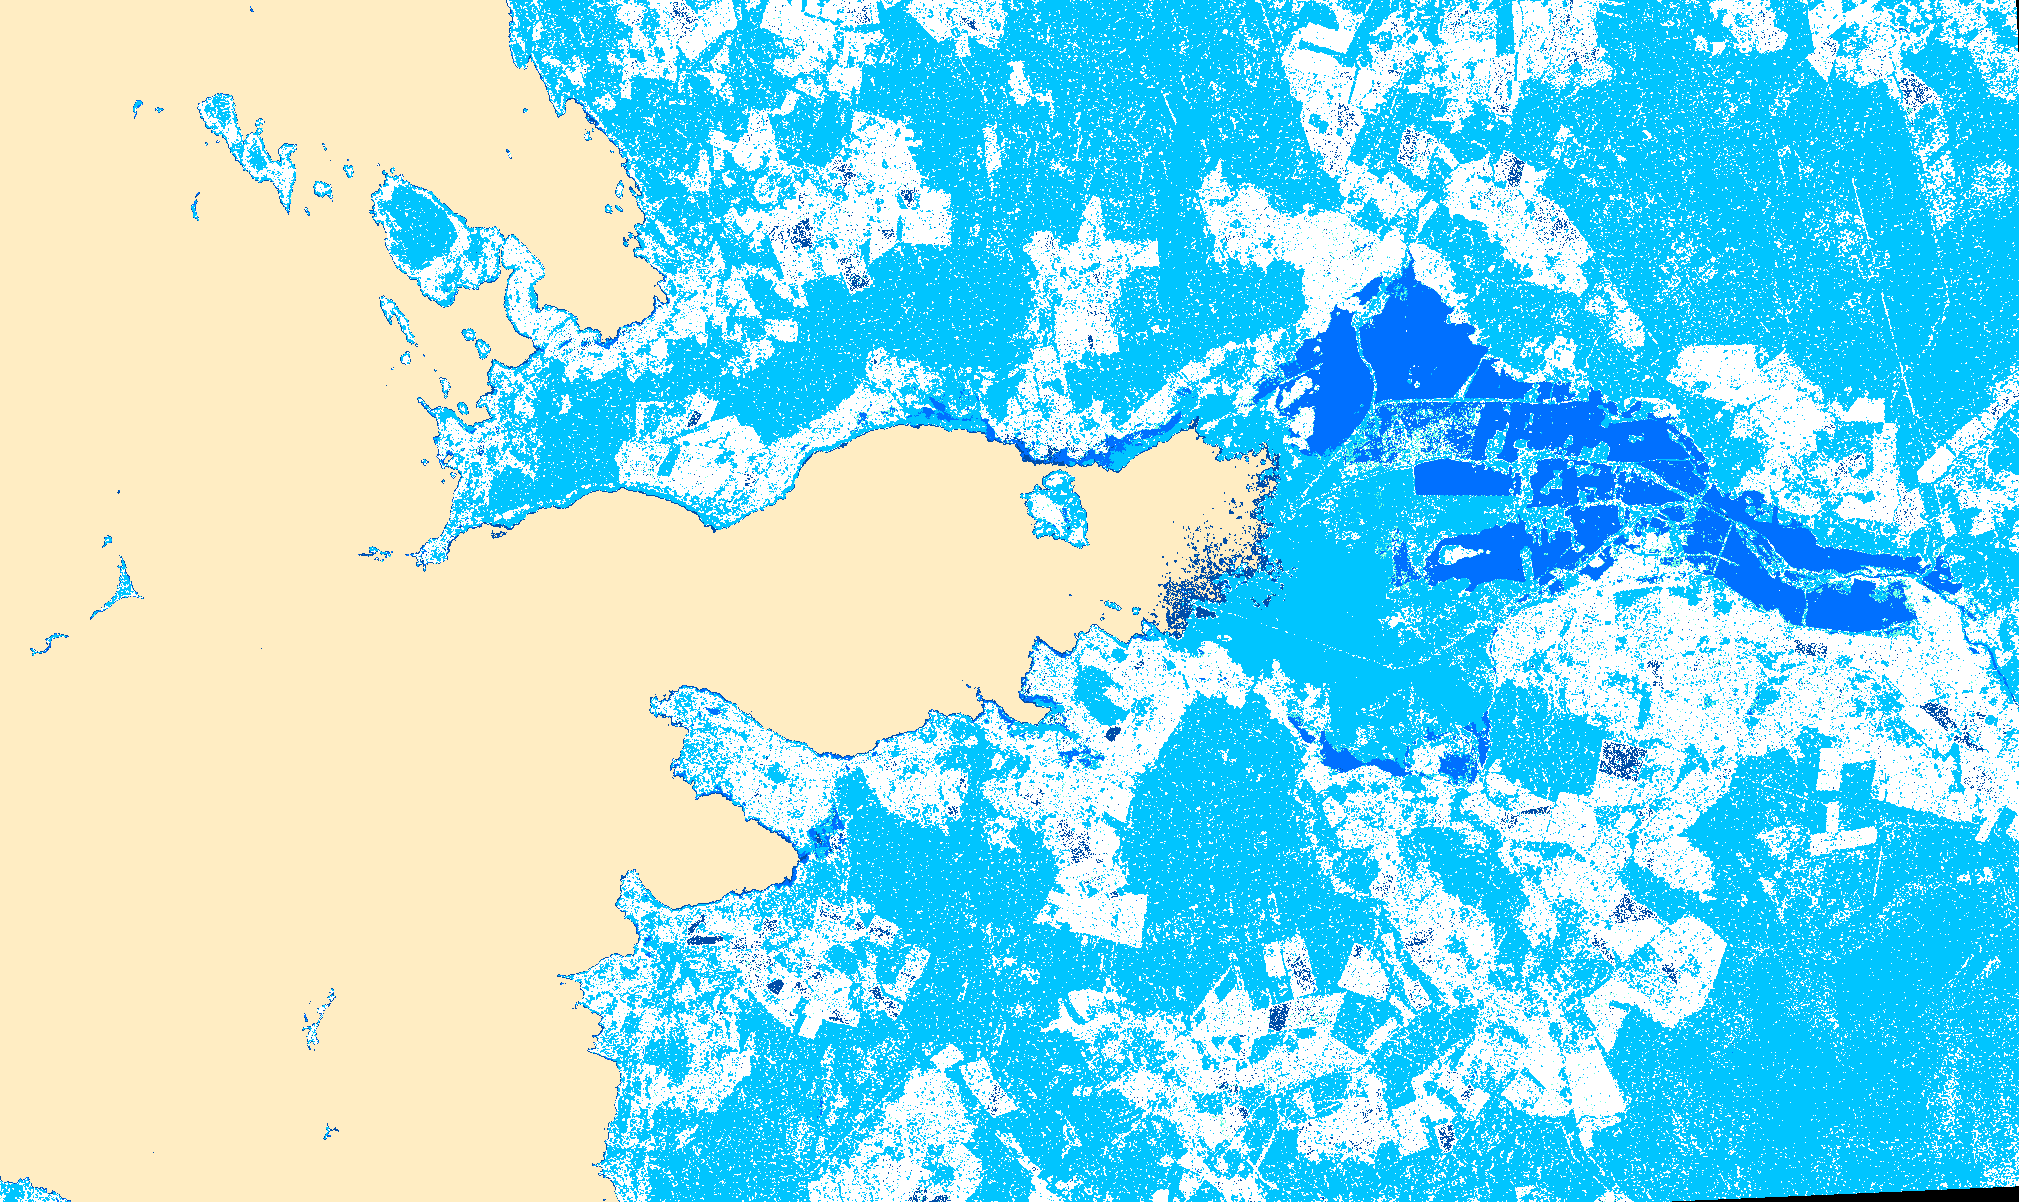

#### Predicted image with masked edge pixels:
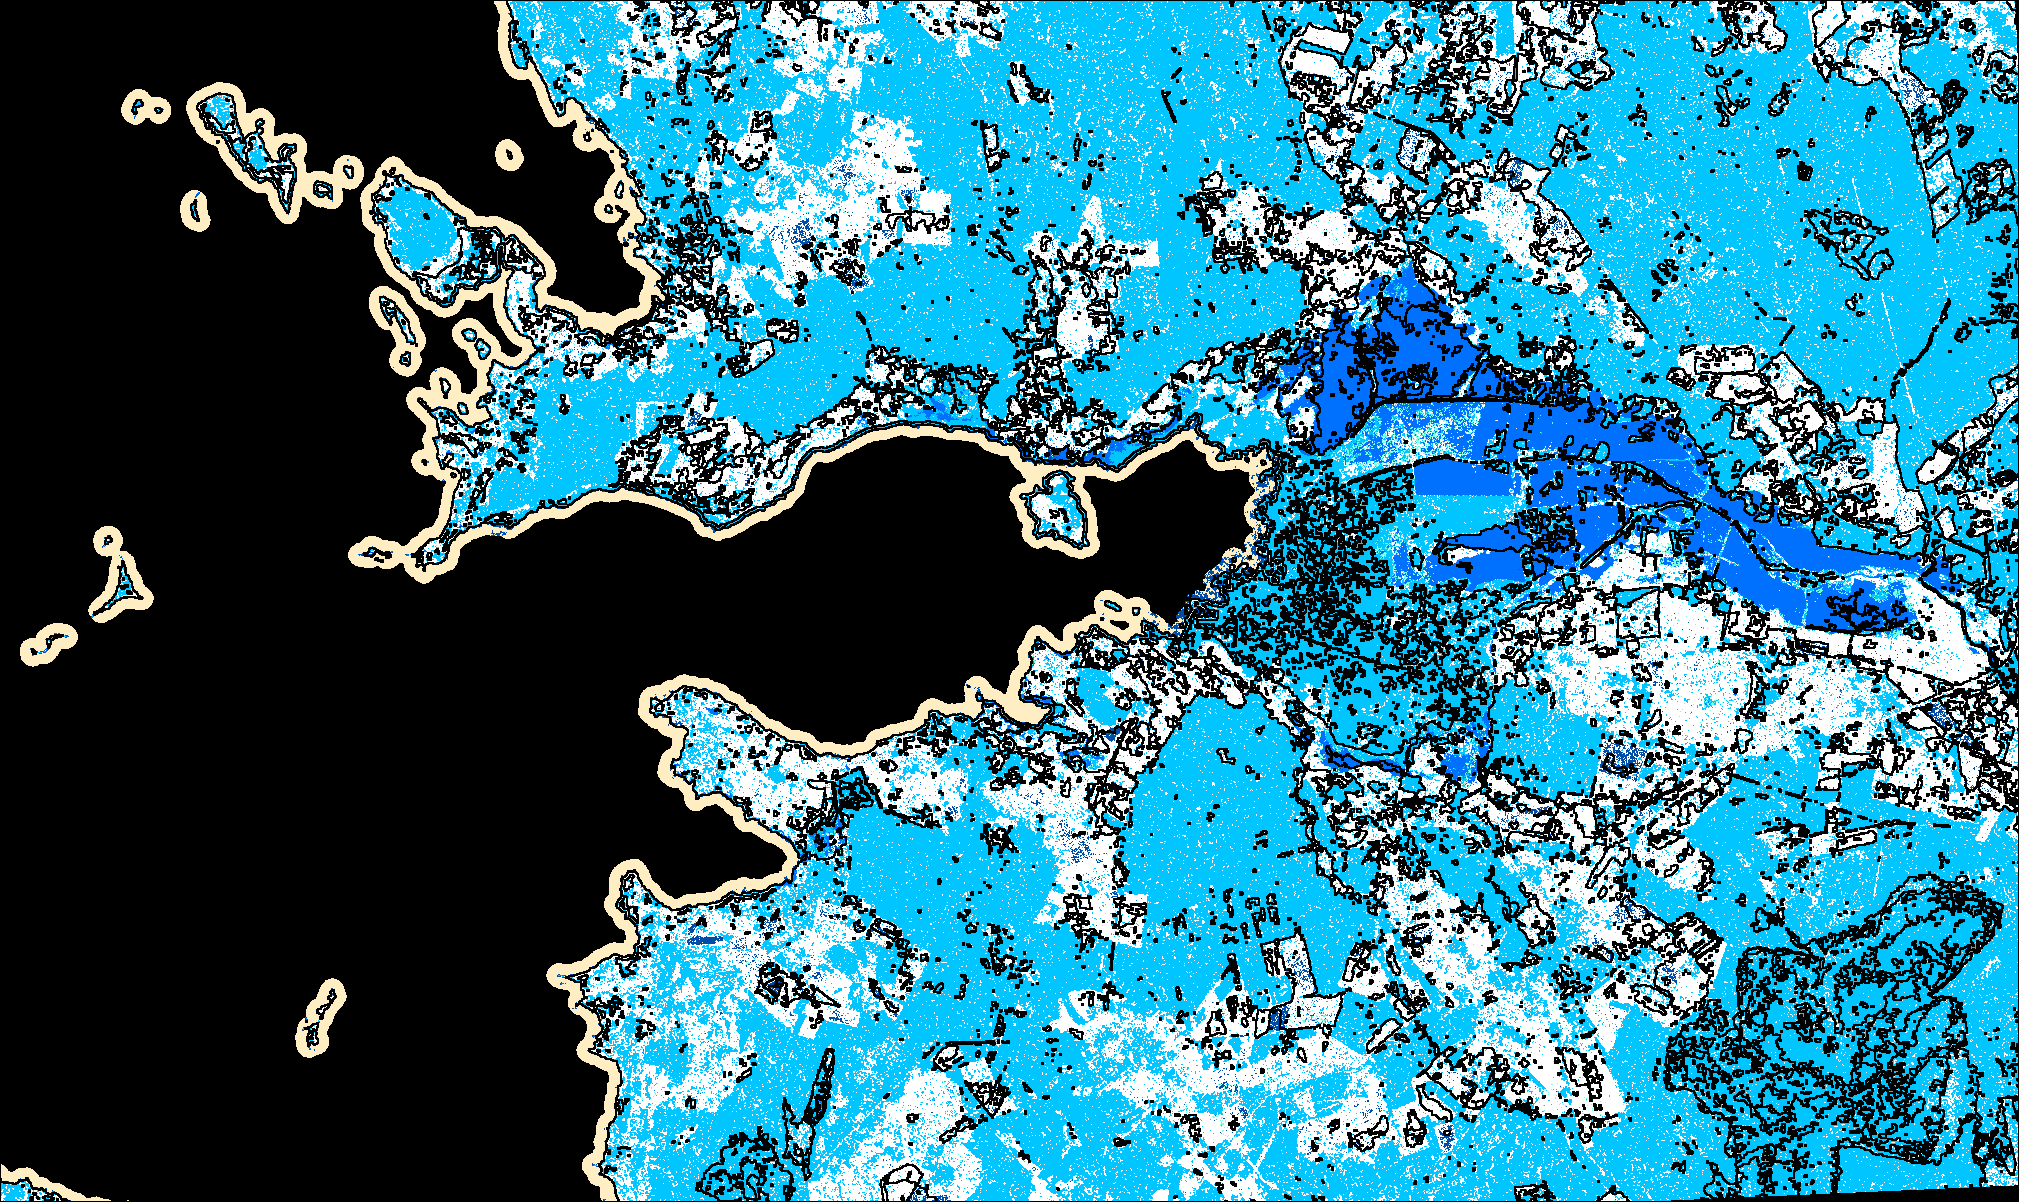

#### Accuracy accessment - Confusion Matrix with numerical measures:
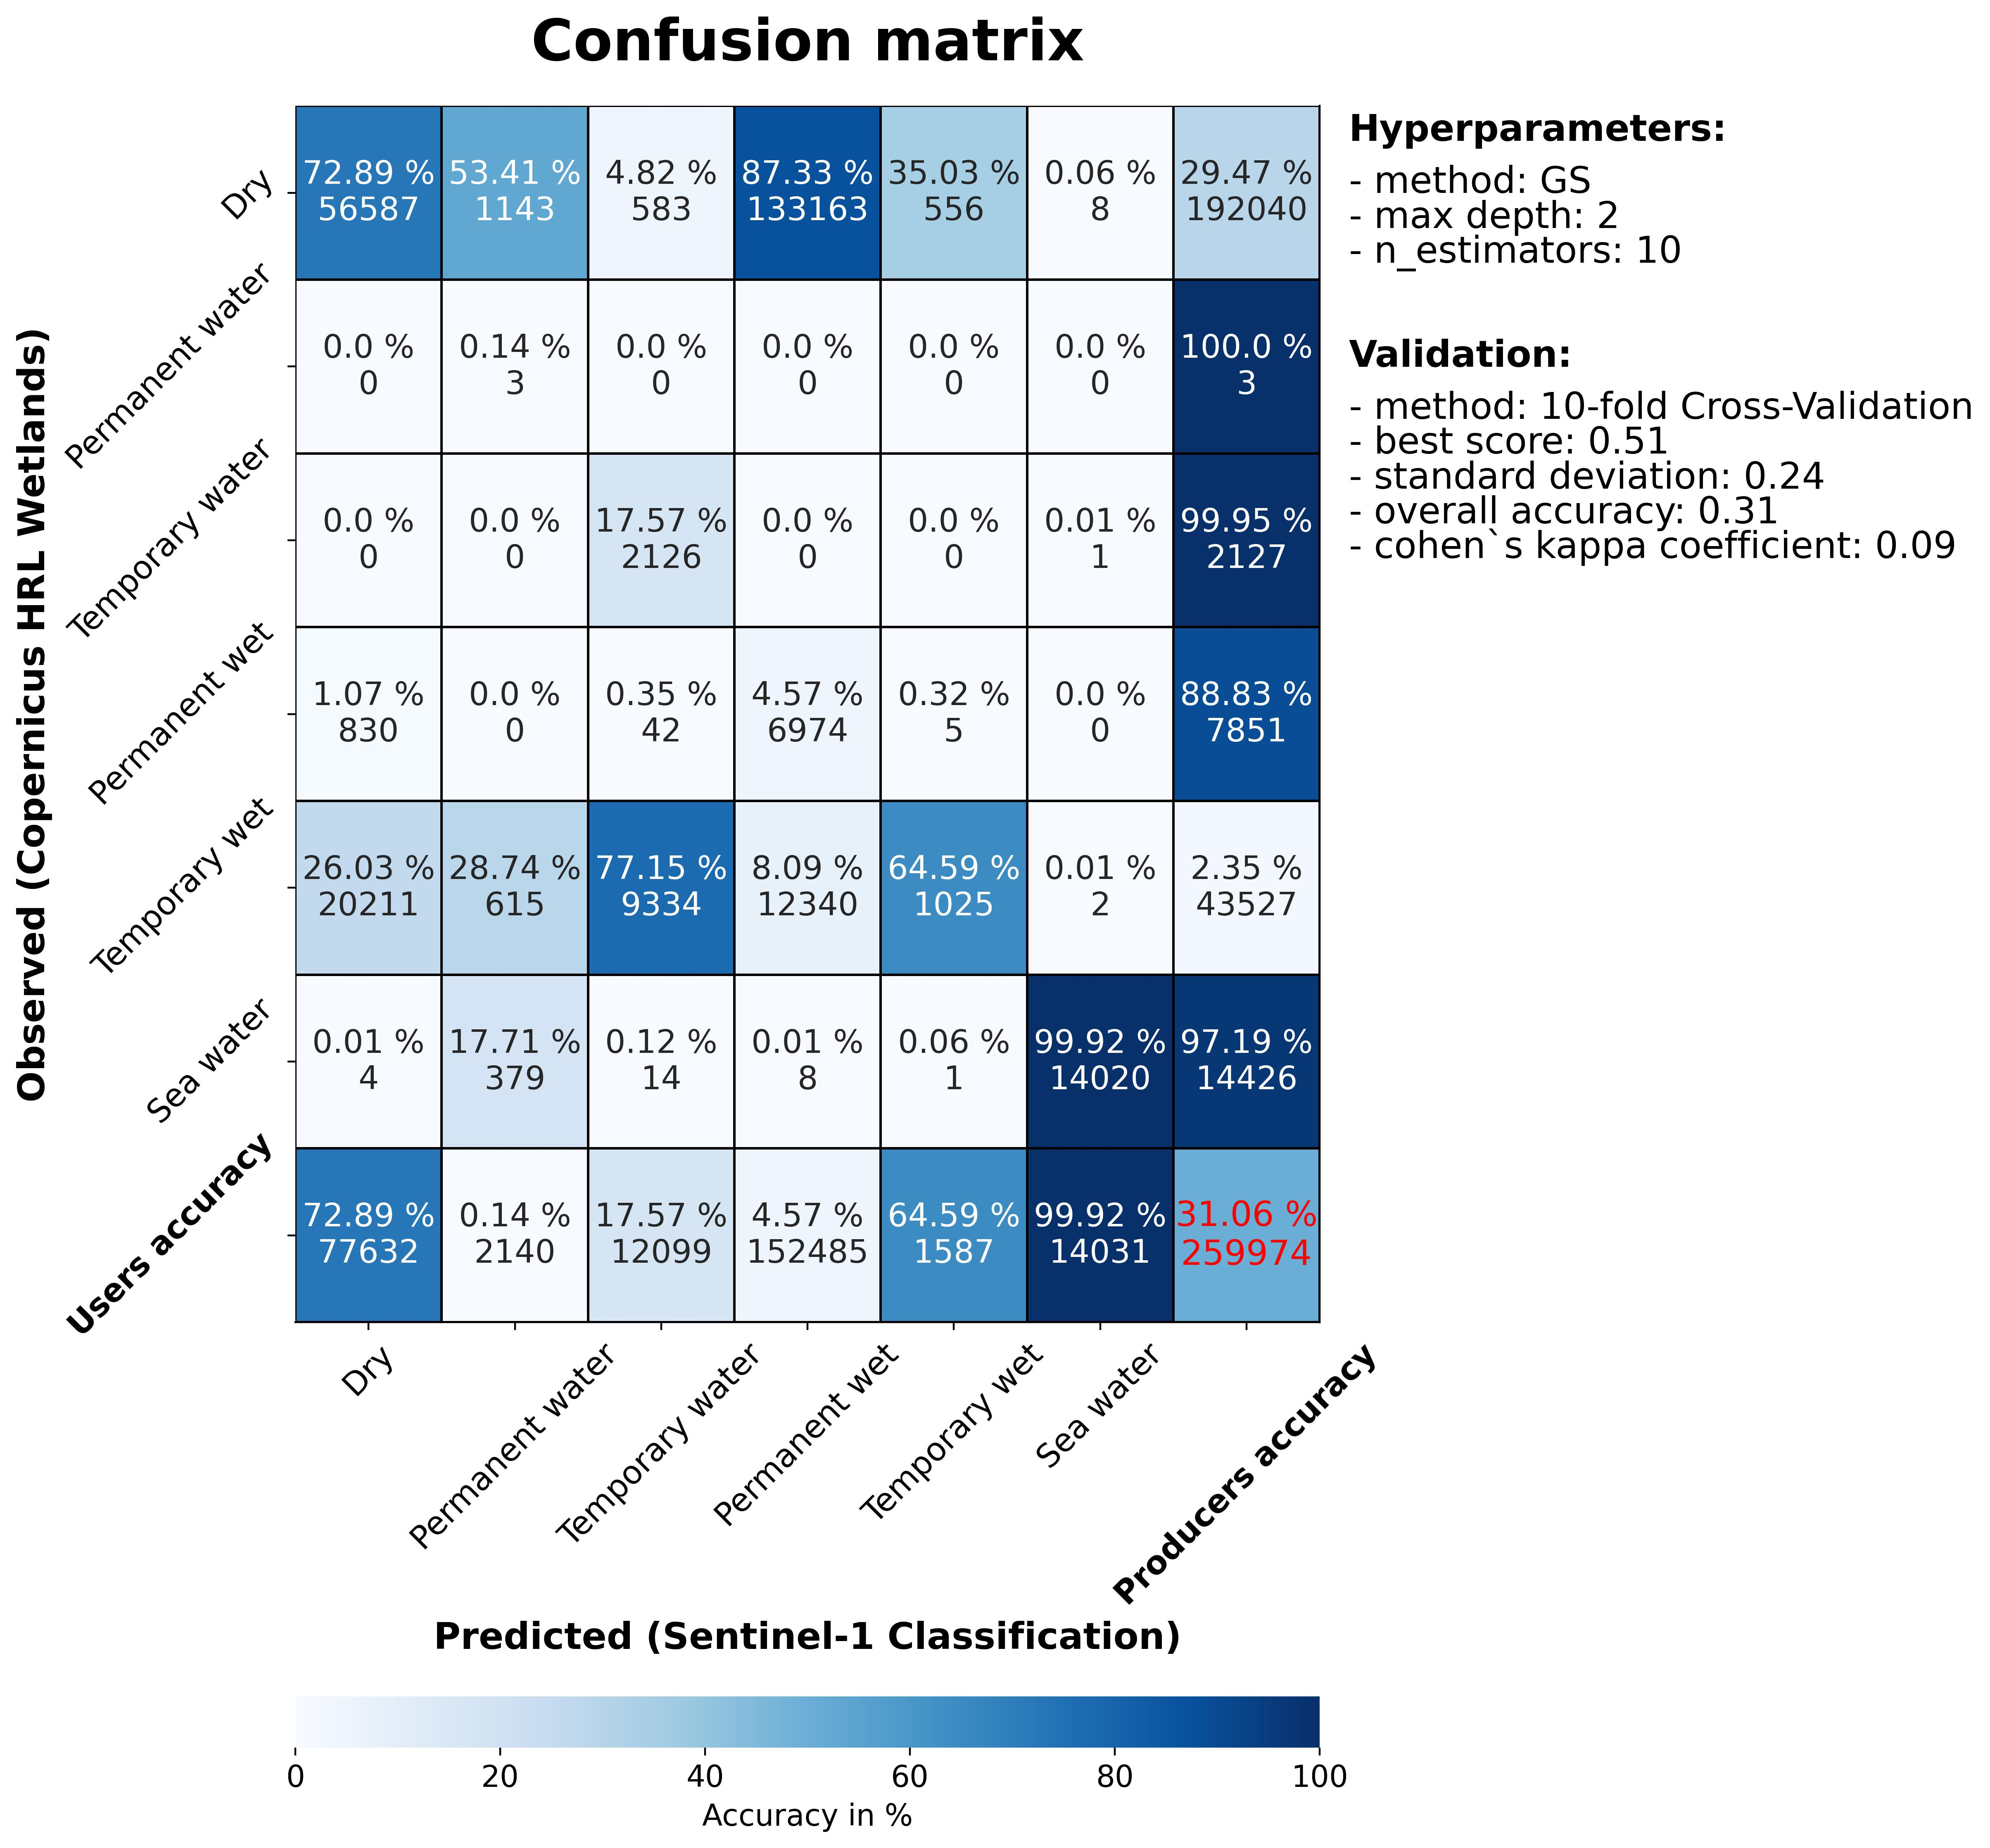

<a id='7'></a>
## 7. Repeat classification
Ask the user to start a new classification (<span style="color:DodgerBlue">*user_yes_no_query*</span>). 
<br>Repeat step 5. (**RandomForest classification**)  to 7. (**Repeat classification**). 
<br>Keep in mind all runs will be saved.

<br>Back to [Content](#0)

<a id='22'></a>

In [36]:
from module import user_yes_no_query
import time
question = 'Are you satisfied with the results and want to proceed?'
repeat_classification = False
while repeat_classification == False:
    print('Placeholder for model_call')
    time.sleep(.5) # Debug, print the placerholder before the question
    repeat_classification = user_yes_no_query(question)

Placeholder for model_call
Are you satisfied with the results and want to proceed? [(y/1)/(n/0)]
n
Placeholder for model_call
Are you satisfied with the results and want to proceed? [(y/1)/(n/0)]
y


If the user is satisfied with the results the programm will end.